In [1]:
#will consolidate: model evaluation, data preprocessing, feature
#engineering and tackling overfitting in a seven step workflow

#there are four types of machine learning

#supervised learning
# learning to map inputs to targets, given a set of examples
# most common type by far
# mostly classification and regression but also: sequence
# generation, syntax tree prediction, object detection, image
# segmentation

#unsupervised learning
# finding transformations of data without any targets for
# data viz, compression, denoising, etc.
# mostly dimensionality reduction (tSNE) and clustering (k-means)

#self-supervised learning
# like supervised learning but without "human labels", there
# are still labels involved but they are generated from the
# data
# mostly encoders, where the targets are the inputs; trying
# to predict the next frame in a video, given past frames; 
# or next word in a text, given previous words

# the line between the 3 supervised learning types isn't 
# set in stone, but the majority of this book is supervised
# with some self-supervised at the end

#reinforcement learning
# agent receives information about its environment, learns to
# choose actions that maximize a reward
# currently limited to games

In [2]:
#classification/regression glossary

#sample/input - what goes into the model
#prediction/output - what comes out of the model
#target - what your model should have predicted
#pred. error/loss - distance between prediction and target
#class - set of labels to choose from
#label - a specific instance of a class annotation
#ground truth/annotations - ALL targets
#binary classification - classification with 2 classes
#multi-class classification - classification with >2 classes
#multi-label classification - classification where each sample
#                             can be from >1 class
#scalar regression - target is a continuous scalar value
#vector regression - 

In [3]:
#split models into train, val and test

#you always overfit on the train if you don't use regularization
#want to generalize, that is achieve good accuracy on unseen
#examples, overfitting works against this

#why even use a validation set?
#validation is used for tweaking hyperparameters
#eventually you'll overfit on the validation set even though
#your model has never seen it before as your hyperparameters
#will be tuned to the validation set and you'll get poor
#accuracy on the test set, so the test set is to check how
#badly we are overfitting on the validation set

#a concept called "information leak", whenever you tune 
#hyperparamters based on validation set performance, info
#about the validation set leaks into the model, adding
#bits of information into the model

#should have no data from the test set at all, even 
#indirectly

#two ways of splitting data:

#1. held-out validation
#simply split the data like 70:15:15 into train:val:test
#if you don't have a lot of data then your validation set
#will be small and your validation set will be a poor
#representation of your testing set due to high variance

#2. k-fold validation
#split data into K partitions of equal size, for each part
#train on K-1 partition and evaluate on the remaining one
#final validation score is the averaged of the K scores

#3. iteratied k-fold validation w/ shuffling
#apply k-fold validation multiple times, shuffling the data
#before each split into K and then getting a validation score
#final validation score is average again

In [4]:
#other points:

#1. data representations - if you have 10 classes in your data
# then you want each of the 10 classes equally represented
# in each of your splits
#2. "arrow of time" - if you're trying to predict the future
# from the past, you shouldn't randomly shuffle data as you'll
# have information from the future
#3. redundancy - in real world data you might have some data
# points appear multiple times, don't want same data in train
# and test

In [5]:
#preprocessing data

#1. vectorization

#data must be tensors of floats or integers

#2. normalization

#don't want features with different ranges or very wide ranges
#as this can create some large parameter updates that slow down
#convergence, ideally want all features to have their mean
#of 0 and a std of 1

#3. missing values

#it's safe to use a number, such as 0 to represent a missing
#value and the network will learn to ignore it, (only if 0 isn't
#being used to represent something in the data) however if you 
#have missing values in the test data but not in training, the
#network won't know how to handle this, therefore you should
#create artifical examples by randomly dropping the features
#that are missing in the test data within the training data

#4. feature engineering

#using your knowledge about the data to make the neural network
#work better by using your own transformations on the data
#apparently it isn't reasonable to expect the model to learn
#from every single representation, imagine trying to get the
#time from a picture of a clock. from the raw image it's very
#difficult, a better way to write something to output the 
#x and y co-ordinates of the clock hands, an even better way
#would be to express the angle of each hand (wouldn't even
#need to use machine learning in this case)

#deep learning can learn from raw data, does this mean we don't
#need to use feature engineering? no.
#1. good features allow you to solve the problems easier
#   i.e. less resources, simplier network
#2. good features allow you to use less data

In [6]:
#over/underfitting

#overfitting always happens as long as your model isn't too
#small
#it arises in the trade-off between optimization and
#generalization. optimization is adjusting the parameters of
#the model to get the best performance possible on the training
#data, whereas generalization refers to how well the model
#performs on data it has never seen before. 
#you want to get the best generalization as possible, but you
#can only optimize on the training data you have

#at the beginning of training, optimization and generalization
#losses both decrease. this is your model underfitting, it has
#yet to model the patterns in the training data. after a 
#number of iterations, generalization stops improving
#and the validation metrices degrade, this is when the model 
#is said to be overfitting, i.e. it is learning patterns
#specific to just the training data only.

#the best solution to overfitting? get more training data.
#with more data the model will generalize better

#usually getting more data isn't available, the next best thing
#is to reduce the information your model can store or add
#constraints on what it can store. the model will only be 
#able to remember a reduced number of patterns and therefore
#optimization will cause it to remember the most useful 
#patterns, which gives it a better chance of generalizing

#this is called regularization

In [7]:
#regularization

#the easiest way to perform overfitting is to reduce the 
#size of the model which reduces the number of learnable
#parameters and thus the number of patterns the model can
#memorize (aka a compressed representation), forcing it to 
#learn the most useful ones that generalize the best

#a model's number of learnable parameters is often called
#it's capacity

#however, if you reduce the parameters too much, the model
#will underfit

#there's no mathematical formula to say how many layers/
#parameters you need, usually start with a small one, see
#if you can overfit and if you do then increase the 
#number of parameters

In [11]:
#weight regularization

#occam's razor: given two explanations for something the most
#likely one to be correct is the simplest one as it makes the
#least amount of assumptions
#same can apply to neural networks, given multiple models
#the "simpler" ones are less likely to overfit than complex 
#ones

#a simpler model in this context means the distribution of 
#parameters has less entropy, thus a common way to prevent
#overfitting is to put constraints on the complexity of a 
#network by forcing its weight to take only small values which
#makes the values of the weights more regular. this is called
#weight regulatization.

#done by adding to the loss function a cost associated with
#having large weights, there are two types:
#1. L1 regularization - cost is the absolute value
#                       of the parameter values (L1 norm)
#2. L2 regulatization - cost is the squared value of the 
#                       parameter values (l2 norm)
#L2 regularization is also known as weight decay

from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, 
                       kernel_regularizer=regularizers.l2(0.001),
                       activation='relu',
                       input_shape=(10_000,)))
model.add(layers.Dense(16, 
                       kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1,
                       activation='sigmoid'))

#this means that every value in the weight matrix will add
#0.001 * value ** 2 to the final loss

#note: this loss is only applied during training, so the 
#test loss will be a lot higher

#can also do:
# regularizers.l1(x)
# regularizers.l1_l2(l1=x, l2=y)

In [12]:
#dropout

#most effective and commonly used regularization techniques
#a dropout layer consists of randomly dropping (setting to zero)
#a number of output features of a layer during training
#i.e. if the layer would normally return [.2, .3, .4, .5]
#after we apply dropout the layer might be [0, .3, 0, .5]

#the dropout rate is the probability for each feature that
#it will be zeroed out, usually around 0.5

#during test time, no features are zeroed out, instead the
#layer's outputs are scaled down by a factor equal to the 
#dropout rate to balance the fact that more units are
#active than at training time, i.e. if our dropout rate was
#0.5, then at testing time we would multiply each output
#value of that layer by 0.5
#we can do the scaling at training time by dividing the
#output of the values by the dropout rate, i.e. multiply
#by 1/0.5 = multiply by 2

#the core idea of dropout is that introducing noise in the
#network can break up coincidental pattrns that aren't 
#significant, which the network will memorize if no noise is
#present, wasting capacity on them

#use dropout in keras by adding a dropout layer

model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(1, activation='sigmoid'))

#YOU NEVER APPLY DROPOUT TO THE OUTPUT LAYER

In [13]:
#to recap, best way to prevent overfitting:
#1. get more training data
#2. reduce capacity of the network
#3. add weight regularization
#4. add dropout

In [1]:
#UNIVERSAL WORKFLOW OF MACHINE LEARNING

#this is a workflow to solve any machine learning problems

#1. defining the problem and assembling a dataset

#what will the input be?
#what are you trying to predict?
#need the correct data and labels for your task

#what type of problem are you facing?
#binary classification? multiclass classification? regression?
#generation? clustering? reinforcement learning?
#once you have identified the problem type, this will help
#guide your choice in architecture, loss function, etc.

#current have 2 hypotheses:
#your outputs can be predicted given your inputs
#your data is sufficiently informative to learn the 
# relationship between inputs and outputs

#some problems are non-stationary, i.e. recommender system
#for clothing, this changes with the seasons, so your data
#from summer won't be good for the winter, you should 
#collect data for all year round and use the date in your
#input

#2. choose a measure of success

#you need to define what you mean by success. 
#accuracy? precision and recall? 
#your metric for success will guide the choice of loss function
#i.e. what your model will optimize for, and should align
#with your goals

#for balanced classification, accuracy and ROC AUC
#for imbalanced classification, precision and recall
#for ranking/multilabel, mean average precision

#3. decide on evaluation protocol

#need to establish how you'll measure your current progress
#either: held-out validation set, K-fold cross-validation
#or iterated K-fold validation

#4. preparing your data

#format data as tensors
#scaled to small values, i.e. [-1,1] or [0,1]
#normalize data so all features are within same range by
#subtracting the mean and dividing by the std.
#potentially do some feature engineering

#5. develop a model that is better than a baseline

#first need to build a small, simple model that can beat
#a bad baseline, i.e. random choice
#if you can't beat the baseline it means your data doesn't
#contain enough information to solve your problem
#this means one (or both) of your hypotheses from earlier are
#false and you need to re-define the problem or think harder

#assuming it does go well, need to think about:
#activation function in the last layer: softmax, sigmoid, none
#loss function: binary/categorical cross-entropy, MSE
#optimizer: SGD, RMSprop, Adam, etc.

#can always use your success metric as a loss function, i.e.
#ROC AUC can't be directly optimizer, hence you optimize
#a proxy such as cross-entropy and hope that lower
#crossentropy gives you higher ROC AUC

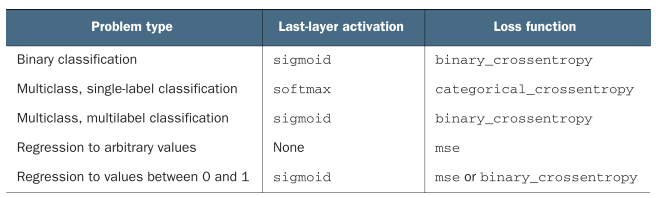

In [2]:
#4.5 scale up and develop a model that overfits

#once you've got a model that can beat the baseline
#determine if it overfits the problem at hand
#trade-off between optimization and generalization

#first overfit by:
#- adding more layers
#- making the layers bigger
#- training for more epochs

#4.6 regularization and hyperparameter tuning

#this part takes the most time
#keep tweaking the model to achieve peak validation performance
#try: 
#- adding dropout
#- adding l1 and/or l2 regularization
#- try different architectures
#- try different hyperparameters
#- feature engineering

#if you get good validation score but poor test score then
#you have overfit on the validation set, meaning your 
#validation set isn't a good enough representation of your
#test set, if this is the case then try K-fold cross validation

In [3]:
#summary

#define the problem and get the data
#choose which metrics equate to success
#which evaluation protocol (hold out/k-fold)
#beat random choice baseline
#overfit
#regularize and tune hyperparamters